###Import Module



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###Load Data

In [ ]:
data = pd.read_csv('Frogs_MFCCs.csv')
data.drop(data.tail(1).index,inplace=True) # drop last n rows remove nan value
df = data.drop(columns=['Genus', 'Species', 'RecordID'])

#seperate values and label
X = df.iloc[:,:-1]
y = df.Family

#LabelEncoding 
classes = list(df['Family'].unique())
class_no = list(range(len(classes)))
class_dict = {cls:index for cls, index in zip(classes, class_no)}
y = y.map(lambda x: class_dict[x])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

###Linear SVM

In [ ]:
clf = SVC(kernel = 'linear', C = 1)
clf.fit(X_train,y_train)

#prediction 
y_pred = clf.predict(X_test)

In [ ]:
print('Confusion matrix:', '\n')
print(confusion_matrix(y_test,y_pred))
print('\n', 'classification report:', '\n')
print(classification_report(y_test,y_pred))
print('\n','accuracy score is :{}'.format(accuracy_score(y_test, y_pred)),'\n')

Confusion matrix: 

[[1306    4   25    0]
 [   6  147    4    0]
 [  64    4  577    0]
 [   3    0   19    0]]

 classification report: 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1335
           1       0.95      0.94      0.94       157
           2       0.92      0.89      0.91       645
           3       0.00      0.00      0.00        22

    accuracy                           0.94      2159
   macro avg       0.70      0.70      0.70      2159
weighted avg       0.93      0.94      0.94      2159


 accuracy score is :0.9402501157943493 



In [ ]:
print('support vectors: ')
print(clf.support_vectors_)
print('indices of support vectors: ')
print(clf.support_)
print('number of support vectors for each class: ')
print(clf.n_support_)

support vectors: 
[[ 1.          0.42865589  0.32847314 ... -0.09249433 -0.00562693
   0.18984569]
 [ 0.68035826  0.67696243  0.44908354 ... -0.09075035  0.12475397
  -0.16070536]
 [ 1.          0.62107731  0.1590218  ... -0.13581343 -0.02290922
   0.09790742]
 ...
 [ 1.          0.52348428  0.52599491 ...  0.04155188  0.0385977
   0.03131283]
 [ 1.          0.34938048  0.2861768  ...  0.0135668   0.01992975
   0.00302753]
 [ 1.          0.3891315   0.33575211 ... -0.00115828  0.00528753
   0.00362833]]
indices of support vectors: 
[  11   14   35 ... 4696 4823 4915]
number of support vectors for each class: 
[408 190 441  46]


###Nonlinear SVM

## C = 0.001
acc: 0.613 (+/-0.000)
## C = 0.01
acc: 0.616 (+/-0.004)
## C = 0.1
acc: 0.793 (+/-0.030)
## C = 1
acc: 0.716 (+/-0.014)
## C = 10
acc: 0.651 (+/-0.015)
## C = 100
acc: 0.636 (+/-0.012)
## C = 1000
acc: 0.635 (+/-0.011)
## C = 10000
acc: 0.635 (+/-0.012)
Confusion matrix:
 [[1173   16  146    0]
 [  50  100    7    0]
 [ 129   29  487    0]
 [  11    0   11    0]]


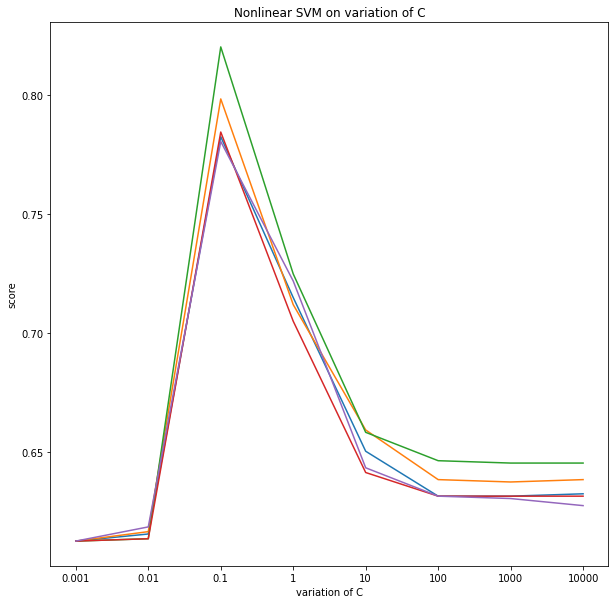

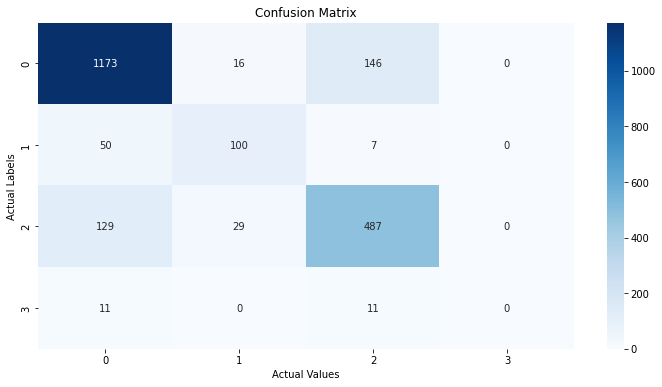

In [ ]:
c = [0.001, 0.01, 0.1,1, 10, 100, 1000, 10000]
score_matrix = []
for index in c:
  print("## C = {}".format(index))
  clf = SVC(kernel = 'sigmoid', C = index)
  scores = cross_val_score(clf, X_train, y_train, cv = 5)
  score_matrix.append(scores)
  print("acc: %0.3f (+/-%0.3f)" % (scores.mean(), scores.std()* 2))

c = ['0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000']
plt.figure(figsize=(10,10))
plt.title("Nonlinear SVM on variation of C")
plt.xlabel("variation of C")
plt.ylabel("score")
plt.plot(c, score_matrix)

#support vector
#best choose for C is 0.1
clf = SVC(kernel='sigmoid', C = 0.1)
clf.fit(X_train, y_train)
#prediction 
y_pred = clf.predict(X_test)

#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n', cm)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Labels")
plt.xlabel("Actual Values")
plt.show()


In [ ]:
print('support vectors: ')
print(clf.support_vectors_)
print('indices of support vectors: ')
print(clf.support_)
print('number of support vectors for each class: ')
print(clf.n_support_)

support vectors: 
[[ 1.          0.2621793   0.35517166 ... -0.0481816   0.11460175
   0.15225504]
 [ 1.          0.33424574  0.37449998 ... -0.04425948  0.15804804
   0.20748945]
 [ 1.          0.35831345  0.2516649  ... -0.17792577  0.08707207
   0.22716209]
 ...
 [ 1.          0.52348428  0.52599491 ...  0.04155188  0.0385977
   0.03131283]
 [ 1.          0.34938048  0.2861768  ...  0.0135668   0.01992975
   0.00302753]
 [ 1.          0.3891315   0.33575211 ... -0.00115828  0.00528753
   0.00362833]]
indices of support vectors: 
[   2    3    5 ... 4696 4823 4915]
number of support vectors for each class: 
[1234  385 1258   46]


###SVM with Kernel

## degree = 2 ##
## kernel = rbf ##
acc: 0.974 (+/-0.005)
## kernel = poly ##
acc: 0.967 (+/-0.007)
## degree = 3 ##
## kernel = rbf ##
acc: 0.974 (+/-0.005)
## kernel = poly ##
acc: 0.973 (+/-0.007)
Confusion matrix:
 [[1315    3   17    0]
 [   1  150    6    0]
 [  46   12  587    0]
 [   3    0   19    0]]


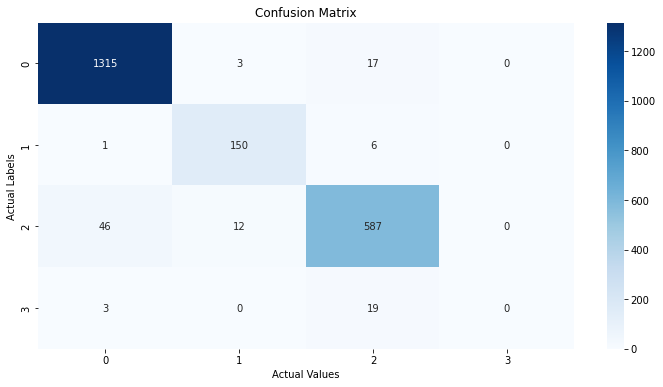

In [ ]:
k = ['rbf', 'poly']
degree = [2, 3]

for i in degree:
  print("## degree = {} ##".format(i))
  for j in k:
    print("## kernel = {} ##".format(j))
    svm_kernel = SVC(kernel = j, degree = i)
    scores = cross_val_score(svm_kernel, X_train, y_train, cv = 5)
    print("acc: %0.3f (+/-%0.3f)" % (scores.mean(), scores.std()* 2))

#best choose is kernel = rbf, degree = 2
#support vector
clf = SVC(kernel = 'rbf', degree = 2, C = 0.1)
clf.fit(X_train, y_train)

#predict
y_pred = clf.predict(X_test)

#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n', cm)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Labels")
plt.xlabel("Actual Values")
plt.show()

In [ ]:
print('support vectors: ')
print(clf.support_vectors_)
print('indices of support vectors: ')
print(clf.support_)
print('number of support vectors for each class: ')
print(clf.n_support_)

support vectors: 
[[ 0.68035826  0.67696243  0.44908354 ... -0.09075035  0.12475397
  -0.16070536]
 [ 1.          0.13156087  0.02243197 ... -0.15252987 -0.03971366
   0.19665245]
 [ 1.          0.62107731  0.1590218  ... -0.13581343 -0.02290922
   0.09790742]
 ...
 [ 1.          0.52348428  0.52599491 ...  0.04155188  0.0385977
   0.03131283]
 [ 1.          0.34938048  0.2861768  ...  0.0135668   0.01992975
   0.00302753]
 [ 1.          0.3891315   0.33575211 ... -0.00115828  0.00528753
   0.00362833]]
indices of support vectors: 
[  14   24   35 ... 4696 4823 4915]
number of support vectors for each class: 
[585 321 624  46]


###Nonlinear SVM with softsvm and kernel

[0.001, 0.618341824918944]
[0.01, 0.8355720240852247]
[0.1, 0.9504400185270959]
[1, 0.9759147753589624]
[10, 0.9902732746641963]
[100, 0.9898100972672533]
[1000, 0.9888837424733673]
[10000, 0.9888837424733673]
0.9902732746641963


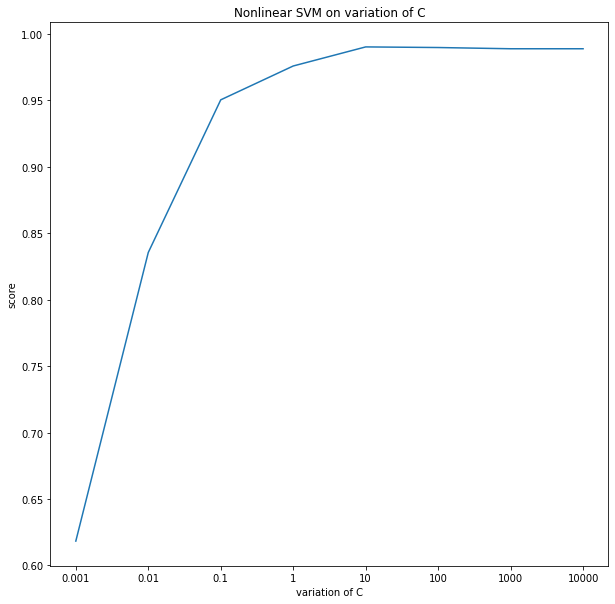

Confusion matrix:
 [[1324    0    8    3]
 [   0  157    0    0]
 [   9    0  636    0]
 [   2    0    0   20]]


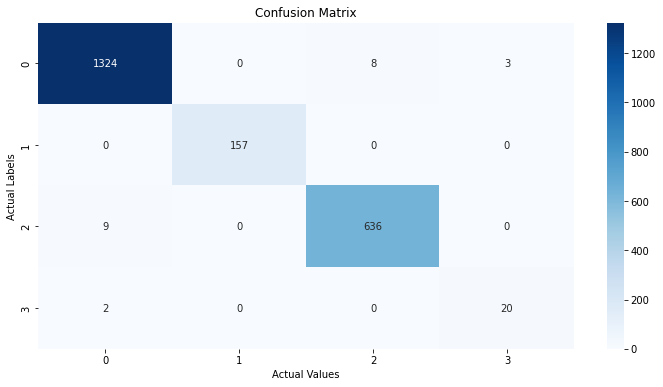

In [ ]:
c = [0.001, 0.01, 0.1,1, 10, 100, 1000, 10000]
acc_matrix = []

for s in c:
  svm_sk = SVC(kernel = 'rbf', C = s, degree = 2)
  svm_sk.fit(X_train, y_train)
  y_pred = svm_sk.predict(X_test)
  acc_test = accuracy_score(y_test,y_pred)
  acc_matrix.append(acc_test)
  print([s, acc_test])

print(max(acc_matrix))

c = ['0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000']
plt.figure(figsize=(10,10))
plt.title("Nonlinear SVM on variation of C")
plt.xlabel("variation of C")
plt.ylabel("score")
plt.plot(c, acc_matrix)
plt.show()

#support vector
#best C = 100
svm_sk = SVC(kernel = 'rbf', C = 100, degree = 2)
svm_sk.fit(X_train, y_train)
y_pred = svm_sk.predict(X_test)

#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n', cm)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Labels")
plt.xlabel("Actual Values")
plt.show()

In [ ]:
print('support vectors: ')
print(clf.support_vectors_)
print('indices of support vectors: ')
print(clf.support_)
print('number of support vectors for each class: ')
print(clf.n_support_)

support vectors: 
[[ 0.68035826  0.67696243  0.44908354 ... -0.09075035  0.12475397
  -0.16070536]
 [ 1.          0.13156087  0.02243197 ... -0.15252987 -0.03971366
   0.19665245]
 [ 1.          0.62107731  0.1590218  ... -0.13581343 -0.02290922
   0.09790742]
 ...
 [ 1.          0.52348428  0.52599491 ...  0.04155188  0.0385977
   0.03131283]
 [ 1.          0.34938048  0.2861768  ...  0.0135668   0.01992975
   0.00302753]
 [ 1.          0.3891315   0.33575211 ... -0.00115828  0.00528753
   0.00362833]]
indices of support vectors: 
[  14   24   35 ... 4696 4823 4915]
number of support vectors for each class: 
[585 321 624  46]


###Nonlinear SVM with softsvm and kernel Kfold

In [ ]:
n_fold = 4
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X, y, test_size = 1/n_fold, random_state = 5, stratify = y)

[0.001, 0.6142301278488049]
[0.01, 0.830461367426348]
[0.1, 0.9571984435797666]
[1, 0.9816564758198999]
[10, 0.9883268482490273]
[100, 0.990550305725403]
[1000, 0.9899944413563091]
[10000, 0.9899944413563091]
0.990550305725403


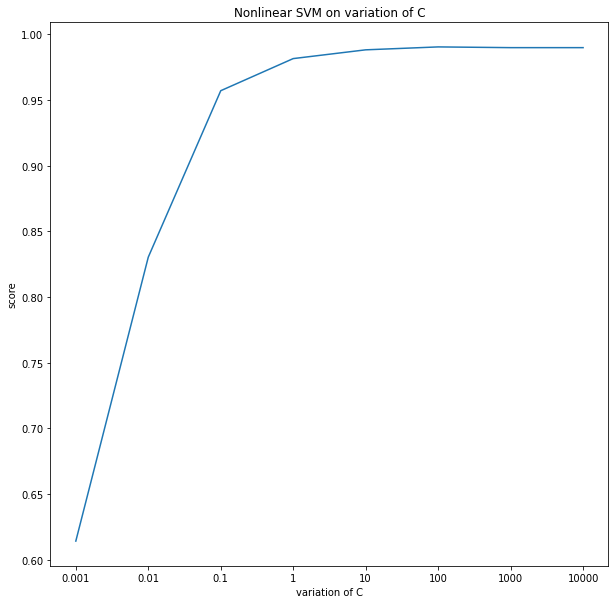

Confusion matrix:
 [[1099    0    6    0]
 [   0  136    0    0]
 [   7    0  532    2]
 [   2    0    0   15]]


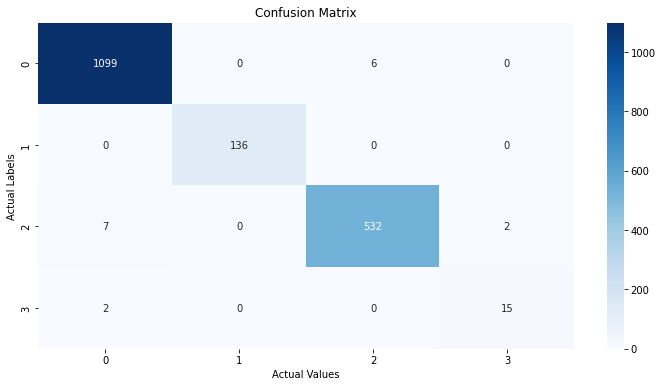

In [ ]:
c = [0.001, 0.01, 0.1,1, 10, 100, 1000, 10000]
acc_matrix_kf = []

for s in c:
  svm_skf = SVC(kernel = 'rbf', C = s, degree = 2)
  svm_skf.fit(X_trainf, y_trainf)
  y_predf = svm_skf.predict(X_testf)
  acc_testf = accuracy_score(y_testf,y_predf)
  acc_matrix_kf.append(acc_testf)
  print([s, acc_testf])

print(max(acc_matrix_kf))

c = ['0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000']
plt.figure(figsize=(10,10))
plt.title("Nonlinear SVM on variation of C")
plt.xlabel("variation of C")
plt.ylabel("score")
plt.plot(c, acc_matrix_kf)
plt.show()

#support vector
#best C = 100
svm_skf = SVC(kernel = 'rbf', C = 100, degree = 2)
svm_skf.fit(X_trainf, y_trainf)
y_predf = svm_skf.predict(X_testf)

#confusion matrix
cm=confusion_matrix(y_testf,y_predf)
print('Confusion matrix:\n', cm)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Labels")
plt.xlabel("Actual Values")
plt.show()

In [ ]:
print('support vectors: ')
print(clf.support_vectors_)
print('indices of support vectors: ')
print(clf.support_)
print('number of support vectors for each class: ')
print(clf.n_support_)

support vectors: 
[[ 0.68035826  0.67696243  0.44908354 ... -0.09075035  0.12475397
  -0.16070536]
 [ 1.          0.13156087  0.02243197 ... -0.15252987 -0.03971366
   0.19665245]
 [ 1.          0.62107731  0.1590218  ... -0.13581343 -0.02290922
   0.09790742]
 ...
 [ 1.          0.52348428  0.52599491 ...  0.04155188  0.0385977
   0.03131283]
 [ 1.          0.34938048  0.2861768  ...  0.0135668   0.01992975
   0.00302753]
 [ 1.          0.3891315   0.33575211 ... -0.00115828  0.00528753
   0.00362833]]
indices of support vectors: 
[  14   24   35 ... 4696 4823 4915]
number of support vectors for each class: 
[585 321 624  46]
